In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.chrome.options import Options
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [24]:
all_links = None
if 'all_links.csv' in os.listdir('./data'):
    tmp = pd.read_csv('./data/all_links.csv')
    if tmp.count()['all_links'] == 290:
       all_links= tmp['all_links'].to_list()
else: 
    options = webdriver.ChromeOptions()
    # options.add_argument('--headless')  # Uncomment to run headlessly after confirming the script works visually
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    url = "https://www.fotmob.com/leagues/47/stats/season/20720/players/goals/premier-league-players"
    driver.get(url)

    try:
        wait = WebDriverWait(driver, 10) 
        while True:
            
            wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, '.css-fvfi51-LeagueSeasonStatsTableCSS.eybz1nb15 a')))

        
            links = driver.find_elements(By.CSS_SELECTOR, '.css-fvfi51-LeagueSeasonStatsTableCSS.eybz1nb15 a')
            for link in links:
                all_links.append(link.get_attribute('href'))

        
            next_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(@class, 'css-fvfi51-LeagueSeasonStatsTableCSS')]//button[contains(., 'Next')]")))
            if next_button:
                next_button.click()
                
                time.sleep(5)  
            else:
                break
        pd.DataFrame({'all_links': all_links}).to_csv('./data/all_links.csv', index=False)  
    except Exception as e:
        print(f"Error navigating pages: {str(e)}")
    finally:
        driver.quit()



In [26]:
# 
all_links

['https://www.fotmob.com/players/737066/erling-haaland',
 'https://www.fotmob.com/players/1096353/cole-palmer',
 'https://www.fotmob.com/players/690107/alexander-isak',
 'https://www.fotmob.com/players/540088/ollie-watkins',
 'https://www.fotmob.com/players/591734/dominic-solanke',
 'https://www.fotmob.com/players/292462/mohamed-salah',
 'https://www.fotmob.com/players/212867/heung-min-son',
 'https://www.fotmob.com/players/523825/jarrod-bowen',
 'https://www.fotmob.com/players/815006/phil-foden',
 'https://www.fotmob.com/players/961995/bukayo-saka',
 'https://www.fotmob.com/players/1197347/nicolas-jackson',
 'https://www.fotmob.com/players/169719/chris-wood',
 'https://www.fotmob.com/players/620026/hee-chan-hwang',
 'https://www.fotmob.com/players/749736/kai-havertz',
 'https://www.fotmob.com/players/706297/jean-philippe-mateta',
 'https://www.fotmob.com/players/950561/darwin-nunez',
 'https://www.fotmob.com/players/318615/leandro-trossard',
 'https://www.fotmob.com/players/654908/ric

In [33]:

option = Options()
option.headless = True

service = Service(ChromeDriverManager().install())

driver = webdriver.Chrome(service= service, options= options)

url = "https://www.fotmob.com/players/737066/erling-haaland"

driver.get(url)

driver.implicitly_wait(10)

html = driver.page_source
driver.quit()

soup = BeautifulSoup(html, 'html.parser')

def extract_stat(soup, state_title):
    state_item  = soup.find('div',class_='css-2duihq-StatTitle', string = state_title)
    if state_item:
        return state_item.find_next('div', class_ = 'css-6xxhwd-StatValue').span.text.strip()
    return "Not Available"
stats_titles = ['Goals', 'Assists', 'Expected goals (xG)', 'Shots', 'Successful passes', 'Shots on target', 'Penalty goals', 'Expected assists (xA)',
    'Pass accuracy', 'Accurate long balls', 'Long ball accuracy', 'Chances created', 'Successful dribbles', 'Dribble success', 'Touches',
    'Touches in opposition box', 'Dispossessed', 'Fouls won', 'Penalties awarded', 'Tackles won', 'Tackles won %', 'Duels won', 'Duels won %',
    'Aerial duels won', 'Aerial duels won %', 'Interceptions', 'Blocked', 'Fouls committed', 'Recoveries', 'Possession won final 3rd', 'Dribbled past',
    'Yellow cards', 'Red cards']      

state_data = {title: extract_stat(soup, title) for title in stats_titles}  
        
        
    


In [34]:

options = Options()
options.headless = True
service = Service(ChromeDriverManager().install())

# List of player URLs
player_urls = all_links

max_players = 230

# Stats titles
stats_titles = ['Goals', 'Assists', 'Expected goals (xG)', 'Shots', 'Successful passes', 'Shots on target', 'Penalty goals', 'Expected assists (xA)',
    'Pass accuracy', 'Accurate long balls', 'Long ball accuracy', 'Chances created', 'Successful dribbles', 'Dribble success', 'Touches',
    'Touches in opposition box', 'Dispossessed', 'Fouls won', 'Penalties awarded', 'Tackles won', 'Tackles won %', 'Duels won', 'Duels won %',
    'Aerial duels won', 'Aerial duels won %', 'Interceptions', 'Blocked', 'Fouls committed', 'Recoveries', 'Possession won final 3rd', 'Dribbled past',
    'Yellow cards', 'Red cards'
                ]

all_players_stats = []

for idx, url in enumerate(player_urls[:max_players]):
    driver = webdriver.Chrome(service=service, options=options)
    driver.get(url)
    driver.implicitly_wait(10) 
    html = driver.page_source
    driver.quit()

    soup = BeautifulSoup(html, 'html.parser')

    # Extract player name
    try:
        name_tag = soup.find('h1', class_='css-xgh3st-PlayerNameCSS')
        if name_tag:
            player_name = name_tag.text.strip()
        else:
            player_name = "Unknown"
            print(f"Player's name not found for URL: {url}")
    except Exception as e:
        player_name = "Unknown"
        print(f"An error occurred while extracting player's name for URL {url}: {e}")

    player_stats = {'Name': player_name}

    player_stats.update({title: extract_stat(soup, title) for title in stats_titles})

    all_players_stats.append(player_stats)

   

    # Check if we've reached the maximum number of players
    if idx + 1 >= max_players:
        print("Maximum number of players extracted.")
        break




Player's name not found for URL: https://www.fotmob.com/players/690107/alexander-isak
Player's name not found for URL: https://www.fotmob.com/players/706297/jean-philippe-mateta
Player's name not found for URL: https://www.fotmob.com/players/974753/julian-alvarez
Player's name not found for URL: https://www.fotmob.com/players/422685/bruno-fernandes
Player's name not found for URL: https://www.fotmob.com/players/933576/antoine-semenyo
Player's name not found for URL: https://www.fotmob.com/players/654096/declan-rice
Player's name not found for URL: https://www.fotmob.com/players/637746/odsonne-edouard
Player's name not found for URL: https://www.fotmob.com/players/352887/abdoulaye-doucoure
Player's name not found for URL: https://www.fotmob.com/players/935379/dejan-kulusevski
Player's name not found for URL: https://www.fotmob.com/players/391064/neal-maupay
Player's name not found for URL: https://www.fotmob.com/players/820581/ben-brereton-diaz
Player's name not found for URL: https://w

In [71]:
footBall = pd.DataFrame(all_players_stats)

footBall.to_csv('./data/footBall.csv',index=False)

footBall = pd.read_csv('./data/footBall.csv')

In [72]:
footBall = footBall.replace('Not Available', 0)
footBall = footBall[footBall['Name'] != 'Unknown']
footBall

,Name,Goals,Assists,Expected goals (xG),Shots,Successful passes,Shots on target,Penalty goals,Expected assists (xA),Pass accuracy,...,Aerial duels won,Aerial duels won %,Interceptions,Blocked,Fouls committed,Recoveries,Possession won final 3rd,Dribbled past,Yellow cards,Red cards
0,Erling Haaland,25,5,26.23,112,262,57,6,2.14,76.8%,...,36,48.0%,2,20,15,43,21,1,1,0
1,Cole Palmer,21,9,17.24,97,"1,008",44,9,7.31,83.4%,...,1,20.0%,17,26,24,93,25,11,7,0
3,Ollie Watkins,19,12,16.04,103,433,47,0,4.10,76.8%,...,47,37.6%,4,20,21,63,19,6,4,0
4,Dominic Solanke,18,3,18.80,103,385,37,2,2.00,74.0%,...,93,41.7%,7,30,41,97,29,17,3,0
5,Mohamed Salah,18,10,20.08,106,671,51,5,7.24,76.0%,...,6,31.6%,2,21,10,81,24,13,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Hannibal Mejbri,1,0,0.03,1,31,1,0,0.48,83.8%,...,2,33.3%,0,0,5,10,3,2,1,0
224,Illia Zabarnyi,0,0,0.14,2,148,1,0,0.03,88.1%,...,4,80.0%,0,0,3,7,0,2,0,0
226,Jacob Ramsey,1,1,2.17,19,254,5,0,1.37,81.9%,...,5,62.5%,3,4,7,42,5,10,2,0
228,Jamaal Lascelles,1,0,0.79,6,667,1,0,0.12,86.7%,...,47,64.4%,5,1,17,53,2,5,4,0


In [74]:
for column in footBall.columns:
    temp_col = pd.to_numeric(footBall[column], errors='coerce')
    
    if not temp_col.isnull().any():
        
        footBall[column] = temp_col
        
        
footBall

,Name,Goals,Assists,Expected goals (xG),Shots,Successful passes,Shots on target,Penalty goals,Expected assists (xA),Pass accuracy,...,Aerial duels won,Aerial duels won %,Interceptions,Blocked,Fouls committed,Recoveries,Possession won final 3rd,Dribbled past,Yellow cards,Red cards
0,Erling Haaland,25,5,26.23,112,262,57,6,2.14,76.8%,...,36,48.0%,2,20,15,43,21,1,1,0
1,Cole Palmer,21,9,17.24,97,"1,008",44,9,7.31,83.4%,...,1,20.0%,17,26,24,93,25,11,7,0
3,Ollie Watkins,19,12,16.04,103,433,47,0,4.10,76.8%,...,47,37.6%,4,20,21,63,19,6,4,0
4,Dominic Solanke,18,3,18.80,103,385,37,2,2.00,74.0%,...,93,41.7%,7,30,41,97,29,17,3,0
5,Mohamed Salah,18,10,20.08,106,671,51,5,7.24,76.0%,...,6,31.6%,2,21,10,81,24,13,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Hannibal Mejbri,1,0,0.03,1,31,1,0,0.48,83.8%,...,2,33.3%,0,0,5,10,3,2,1,0
224,Illia Zabarnyi,0,0,0.14,2,148,1,0,0.03,88.1%,...,4,80.0%,0,0,3,7,0,2,0,0
226,Jacob Ramsey,1,1,2.17,19,254,5,0,1.37,81.9%,...,5,62.5%,3,4,7,42,5,10,2,0
228,Jamaal Lascelles,1,0,0.79,6,667,1,0,0.12,86.7%,...,47,64.4%,5,1,17,53,2,5,4,0


In [79]:
missing_Value = footBall.shape[0] - footBall.dropna().shape[0]
print ("%d rows have missing values in the football data" %missing_Value)

0

In [76]:
footBall.isnull().sum()

Name                         0
Goals                        0
Assists                      0
Expected goals (xG)          0
Shots                        0
Successful passes            0
Shots on target              0
Penalty goals                0
Expected assists (xA)        0
Pass accuracy                0
Accurate long balls          0
Long ball accuracy           0
Chances created              0
Successful dribbles          0
Dribble success              0
Touches                      0
Touches in opposition box    0
Dispossessed                 0
Fouls won                    0
Penalties awarded            0
Tackles won                  0
Tackles won %                0
Duels won                    0
Duels won %                  0
Aerial duels won             0
Aerial duels won %           0
Interceptions                0
Blocked                      0
Fouls committed              0
Recoveries                   0
Possession won final 3rd     0
Dribbled past                0
Yellow c

In [77]:
ft_test = footBall.nunique()
ft_test

Name                         192
Goals                         20
Assists                       12
Expected goals (xG)          171
Shots                         76
Successful passes            180
Shots on target               42
Penalty goals                  8
Expected assists (xA)        156
Pass accuracy                135
Accurate long balls           75
Long ball accuracy           123
Chances created               60
Successful dribbles           56
Dribble success              109
Touches                      183
Touches in opposition box    109
Dispossessed                  60
Fouls won                     58
Penalties awarded              5
Tackles won                   52
Tackles won %                108
Duels won                    116
Duels won %                  138
Aerial duels won              68
Aerial duels won %           131
Interceptions                 44
Blocked                       30
Fouls committed               49
Recoveries                   118
Possession

In [78]:
ft = footBall.describe()
ft

,Goals,Assists,Expected goals (xG),Shots,Shots on target,Penalty goals,Expected assists (xA),Accurate long balls,Chances created,Successful dribbles,...,Duels won,Aerial duels won,Interceptions,Blocked,Fouls committed,Recoveries,Possession won final 3rd,Dribbled past,Yellow cards,Red cards
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,4.505208,2.557292,4.098281,33.395833,12.598958,0.369792,2.164635,29.479167,22.156250,19.041667,...,97.359375,25.921875,13.578125,9.286458,20.645833,86.619792,11.130208,15.333333,3.500000,0.119792
std,4.319683,2.700950,4.145437,24.947685,10.576602,1.159402,2.053317,36.564503,19.005002,18.022915,...,56.386392,27.724130,12.189350,7.949199,13.365172,55.855706,8.833464,12.771177,2.892489,0.341270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.307500,14.000000,5.000000,0.000000,0.710000,5.750000,8.000000,6.000000,...,59.750000,6.000000,4.000000,3.000000,10.750000,42.000000,4.000000,7.000000,1.000000,0.000000
50%,3.000000,2.000000,2.615000,29.000000,9.500000,0.000000,1.430000,14.500000,17.000000,14.500000,...,95.000000,16.000000,10.000000,8.000000,19.000000,79.500000,9.000000,13.000000,3.000000,0.000000
75%,6.000000,4.000000,5.370000,46.000000,18.000000,0.000000,3.302500,42.000000,30.250000,28.000000,...,132.000000,35.250000,21.000000,13.250000,27.000000,129.250000,16.000000,20.250000,5.000000,0.000000
max,25.000000,12.000000,26.230000,112.000000,57.000000,9.000000,10.730000,215.000000,94.000000,117.000000,...,266.000000,137.000000,52.000000,43.000000,78.000000,212.000000,39.000000,69.000000,13.000000,2.000000


In [80]:
footBall.dtypes


Name                          object
Goals                          int64
Assists                        int64
Expected goals (xG)          float64
Shots                          int64
Successful passes             object
Shots on target                int64
Penalty goals                  int64
Expected assists (xA)        float64
Pass accuracy                 object
Accurate long balls            int64
Long ball accuracy            object
Chances created                int64
Successful dribbles            int64
Dribble success               object
Touches                       object
Touches in opposition box      int64
Dispossessed                   int64
Fouls won                      int64
Penalties awarded              int64
Tackles won                    int64
Tackles won %                 object
Duels won                      int64
Duels won %                   object
Aerial duels won               int64
Aerial duels won %            object
Interceptions                  int64
B

In [85]:

footBall['Name'] = footBall['Name'].str.title() 
footBall

,Name,Goals,Assists,Expected goals (xG),Shots,Successful passes,Shots on target,Penalty goals,Expected assists (xA),Pass accuracy,...,Aerial duels won,Aerial duels won %,Interceptions,Blocked,Fouls committed,Recoveries,Possession won final 3rd,Dribbled past,Yellow cards,Red cards
0,Erling Haaland,25,5,26.23,112,262,57,6,2.14,76.8%,...,36,48.0%,2,20,15,43,21,1,1,0
1,Cole Palmer,21,9,17.24,97,"1,008",44,9,7.31,83.4%,...,1,20.0%,17,26,24,93,25,11,7,0
3,Ollie Watkins,19,12,16.04,103,433,47,0,4.10,76.8%,...,47,37.6%,4,20,21,63,19,6,4,0
4,Dominic Solanke,18,3,18.80,103,385,37,2,2.00,74.0%,...,93,41.7%,7,30,41,97,29,17,3,0
5,Mohamed Salah,18,10,20.08,106,671,51,5,7.24,76.0%,...,6,31.6%,2,21,10,81,24,13,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Hannibal Mejbri,1,0,0.03,1,31,1,0,0.48,83.8%,...,2,33.3%,0,0,5,10,3,2,1,0
224,Illia Zabarnyi,0,0,0.14,2,148,1,0,0.03,88.1%,...,4,80.0%,0,0,3,7,0,2,0,0
226,Jacob Ramsey,1,1,2.17,19,254,5,0,1.37,81.9%,...,5,62.5%,3,4,7,42,5,10,2,0
228,Jamaal Lascelles,1,0,0.79,6,667,1,0,0.12,86.7%,...,47,64.4%,5,1,17,53,2,5,4,0


In [86]:
footBall.head()

,Name,Goals,Assists,Expected goals (xG),Shots,Successful passes,Shots on target,Penalty goals,Expected assists (xA),Pass accuracy,...,Aerial duels won,Aerial duels won %,Interceptions,Blocked,Fouls committed,Recoveries,Possession won final 3rd,Dribbled past,Yellow cards,Red cards
0,Erling Haaland,25,5,26.23,112,262,57,6,2.14,76.8%,...,36,48.0%,2,20,15,43,21,1,1,0
1,Cole Palmer,21,9,17.24,97,"1,008",44,9,7.31,83.4%,...,1,20.0%,17,26,24,93,25,11,7,0
3,Ollie Watkins,19,12,16.04,103,433,47,0,4.10,76.8%,...,47,37.6%,4,20,21,63,19,6,4,0
4,Dominic Solanke,18,3,18.80,103,385,37,2,2.00,74.0%,...,93,41.7%,7,30,41,97,29,17,3,0
5,Mohamed Salah,18,10,20.08,106,671,51,5,7.24,76.0%,...,6,31.6%,2,21,10,81,24,13,2,0


In [94]:
footBall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 229
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       192 non-null    object 
 1   Goals                      192 non-null    int64  
 2   Assists                    192 non-null    int64  
 3   Expected goals (xG)        192 non-null    float64
 4   Shots                      192 non-null    int64  
 5   Successful passes          192 non-null    object 
 6   Shots on target            192 non-null    int64  
 7   Penalty goals              192 non-null    int64  
 8   Expected assists (xA)      192 non-null    float64
 9   Pass accuracy              192 non-null    object 
 10  Accurate long balls        192 non-null    int64  
 11  Long ball accuracy         192 non-null    object 
 12  Chances created            192 non-null    int64  
 13  Successful dribbles        192 non-null    int64  
 14 

C:\Users\idree\AppData\Local\Temp\ipykernel_16960\2018908225.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Goals', data=top_players, palette='coolwarm')


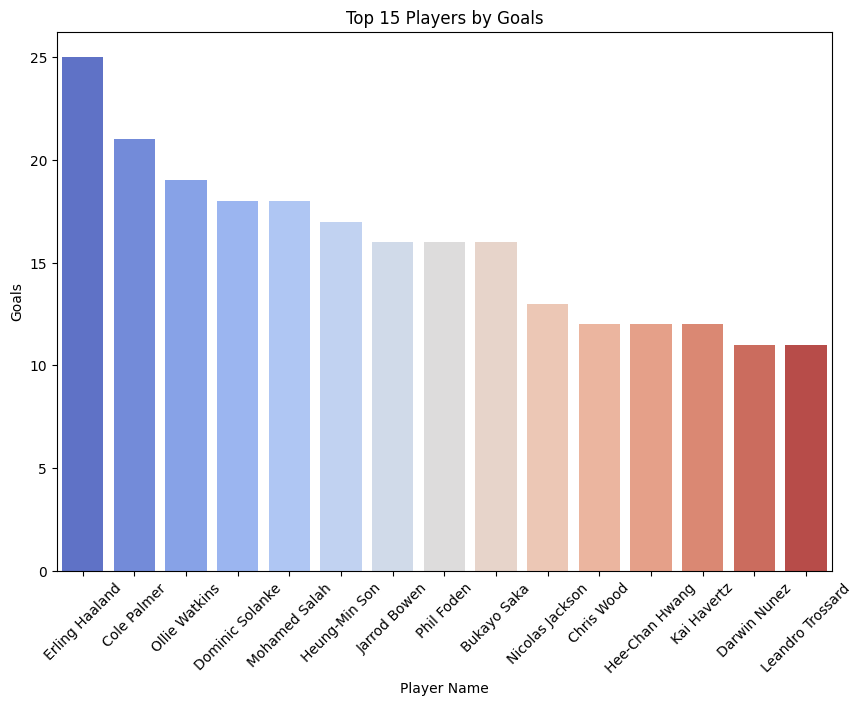

In [101]:
#footBall.boxplot(figsize=(20, 10))

top_players = footBall.nlargest(15, 'Goals')

sns.barplot(x='Name', y='Goals', data=top_players, palette='coolwarm')
plt.title('Top 15 Players by Goals')
plt.xlabel('Player Name')
plt.ylabel('Goals')
plt.xticks(rotation=45)  # Rotates the names on the x-axis for better visibility
plt.show()

In [103]:
footBall.columns

Index(['Name', 'Goals', 'Assists', 'Expected goals (xG)', 'Shots',
       'Successful passes', 'Shots on target', 'Penalty goals',
       'Expected assists (xA)', 'Pass accuracy', 'Accurate long balls',
       'Long ball accuracy', 'Chances created', 'Successful dribbles',
       'Dribble success', 'Touches', 'Touches in opposition box',
       'Dispossessed', 'Fouls won', 'Penalties awarded', 'Tackles won',
       'Tackles won %', 'Duels won', 'Duels won %', 'Aerial duels won',
       'Aerial duels won %', 'Interceptions', 'Blocked', 'Fouls committed',
       'Recoveries', 'Possession won final 3rd', 'Dribbled past',
       'Yellow cards', 'Red cards'],
      dtype='object')

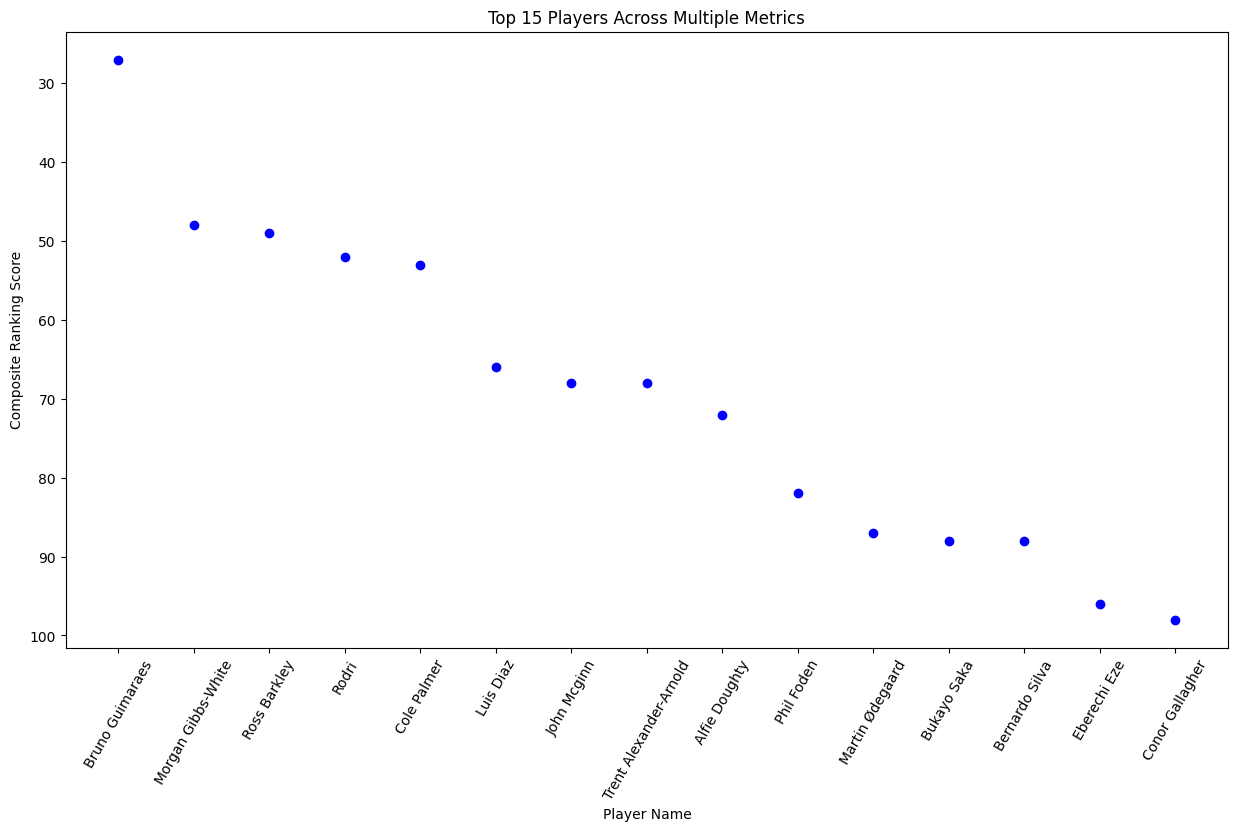

In [108]:
cols_to_convert = ['Pass accuracy', 'Accurate long balls', 'Long ball accuracy', 'Chances created', 'Successful dribbles']
footBall[cols_to_convert] = footBall[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Rank players in each category (lower rank is better, so use ascending=True)
for col in cols_to_convert:
    footBall[col + '_Rank'] = footBall[col].rank(method='max', ascending=False)

# Create a 'Total Rank' by summing up all individual ranks
rank_columns = [col + '_Rank' for col in cols_to_convert]
footBall['Total Rank'] = footBall[rank_columns].sum(axis=1)

# Get the top 15 players by 'Total Rank'
top_players = footBall.nsmallest(15, 'Total Rank')

# Creating the dot plot
plt.figure(figsize=(15, 8))
plt.scatter(top_players['Name'], top_players['Total Rank'], color='blue')  # You can change color
plt.title('Top 15 Players Across Multiple Metrics')
plt.xlabel('Player Name')
plt.ylabel('Composite Ranking Score')
plt.xticks(rotation=60)  # Rotate names for better visibility
plt.gca().invert_yaxis()  # Lower score is better
plt.show()